# Project ReCell

<h2> <a href = #link1>Problem Statement</a> </h2>

<h2> <a href = #link2>Importing necessary libraries</a> </h2>

<h2> <a href = #link3>Reading and Understanding Data</a> </h2>

<h2> <a href = #link4>Exploratory Data Analysis (EDA)</a> </h2>

<h2> <a href = #link5>Data Preprocessing</a> </h2>

<h4> <a href = #link6>Missing value treatment</a> </h4>

<h4> <a href = #link7>Feature Engineering</a> </h4>

<h4> <a href = #link15>EDA (contd.)</a> </h4>

<h4> <a href = #link8>Detecting Outliers</a> </h4>

<h4> <a href = #link9>Handling Outliers</a> </h4>

<h4> <a href = #link16>Variable Transformation</a> </h4>

<h2> <a href = #link10>Building a Linear Regression model</a> </h2>

<h2> <a href = #link11>Model Performance Evaluation</a> </h2>

<h2> <a href = #link12>Linear regression using statsmodel</a> </h2>

<h2> <a href = #link13>Checking Linear Regression Assumptions</a> </h2>

<h2> <a href = #link14>Final Model Summary</a> </h2>

<h2> <a href = #link17>Actionable Insights and Recommendations</a> </h2>

## <a name = 'link1'>Problem Statement</a>

Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.

#### Objective
The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market want to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

#### Data Description
The data contains the different attributes of used/refurbished phones. The detailed data dictionary is given below.

#### Data Dictionary

* brand_name: Name of manufacturing brand
* os: OS on which the phone runs
* screen_size: Size of the screen in cm
* 4g: Whether 4G is available or not
* 5g: Whether 5G is available or not
* main_camera_mp: Resolution of the rear camera in megapixels
* selfie_camera_mp: Resolution of the front camera in megapixels
* int_memory: Amount of internal memory (ROM) in GB
* ram: Amount of RAM in GB
* battery: Energy capacity of the phone battery in mAh
* weight: Weight of the phone in grams
* release_year: Year when the phone model was released
* days_used: Number of days the used/refurbished phone has been used
* new_price: Price of a new phone of the same model in euros
* used_price: Price of the used/refurbished phone in euros

## <a name = 'link2'>Importing necessary libraries</a>

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

<IPython.core.display.Javascript object>

## <a name = 'link3'>Reading and Understanding Data</a>

In [2]:
# loading the dataset
data = pd.read_csv("used_phone_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# check the sample of data
data.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2501,Samsung,Android,13.49,yes,no,13.0,13.0,32.0,4.00,3600.0,181.0,2017,683,198.680,79.47
2782,Sony,Android,13.81,yes,no,NaN,8.0,32.0,4.00,3300.0,156.0,2019,195,198.150,149.10
605,Others,Android,12.70,yes,no,8.0,5.0,16.0,4.00,2400.0,137.0,2015,1048,161.470,48.39
2923,Vivo,Android,19.37,yes,no,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,211.880,138.31
941,Others,Others,5.72,no,no,0.3,0.3,32.0,0.25,820.0,90.0,2013,883,29.810,8.92
1833,LG,Android,13.49,no,no,8.0,1.3,32.0,4.00,3140.0,161.0,2013,670,240.540,96.18
671,Apple,iOS,14.92,yes,no,12.0,7.0,64.0,4.00,5493.0,48.0,2018,403,700.150,350.08
1796,LG,Android,17.78,yes,no,5.0,0.3,16.0,4.00,4000.0,294.8,2014,708,189.300,75.94
757,Asus,Android,13.49,yes,no,13.0,8.0,32.0,4.00,5000.0,181.0,2017,612,270.500,108.13
3528,Realme,Android,15.72,yes,no,NaN,16.0,64.0,4.00,4035.0,184.0,2019,433,159.885,80.00


<IPython.core.display.Javascript object>

#### Observations:
* Each row in the data has details about a model of cell phone
* There are 15 variables for each model of a cell phone

In [4]:
# check number of rows and columns
data.shape

(3571, 15)

<IPython.core.display.Javascript object>

#### Observations:
* There are 3571 rows and 15 columns in the data

In [5]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


<IPython.core.display.Javascript object>

#### Observations:
* There are 4 categorical variables, 2 int and 9 float values in the dataframe
* There are 6 columns with null values

In [6]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [7]:
# checking for missing values
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
* There are 180 missing values for main_camera_mp variable
* int_memory and ram have 10 missing values and selfie_camera_mp, batter and weight have less than 10 missing values

In [8]:
# Let's look at the statistical summary of the data

df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3391.0,NaN,NaN,NaN,9.400454,4.818396,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3569.0,NaN,NaN,NaN,6.547352,6.879359,0.3,2.0,5.0,8.0,32.0
int_memory,3561.0,NaN,NaN,NaN,54.532607,84.696246,0.005,16.0,32.0,64.0,1024.0
ram,3561.0,NaN,NaN,NaN,4.056962,1.391844,0.03,4.0,4.0,4.0,16.0
battery,3565.0,NaN,NaN,NaN,3067.225666,1364.206665,80.0,2100.0,3000.0,4000.0,12000.0


<IPython.core.display.Javascript object>

#### Observations:
* There are 34 unique brand names and 4 unique OS types.
* Android is the most frequently used OS.
* Screen size varies from 2.7 to 46.36 cms.
* There are more cell phones with 4g and very few with 5g.
* main_camera_mp ranges from 0.08 to 48 megapixels with a mean of 9.4 megapixels.
* selfie_camera_mp ranges from 0.3 to 32 megapixels with a mean of 6.5 megapixels.
* int_memory ranges from 0.005 to 1024 Gb with a mean of 4.06 Gb.
* ram ranges from 0.03 to 16.0 Gb with a mean of 4.06 Gb.
* battery ranges from 80 to 12000 mAh with a mean of 3067.23 mAh.
* weight ranges from 23.0 to 950.0 grams with a mean of 179.42 grams.
* The data has details of cell phones released from the year of 2013 to 2020.
* The mean new_price is 237.38 dollars and mean used_price is 109.88 euros.

## <a name = 'link4'>Exploratory Data Analysis (EDA)</a>

In [9]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, ax=ax_hist2, bins=bins, kde=kde, palette="winter",
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### 1. What does the distribution of used phone prices look like?

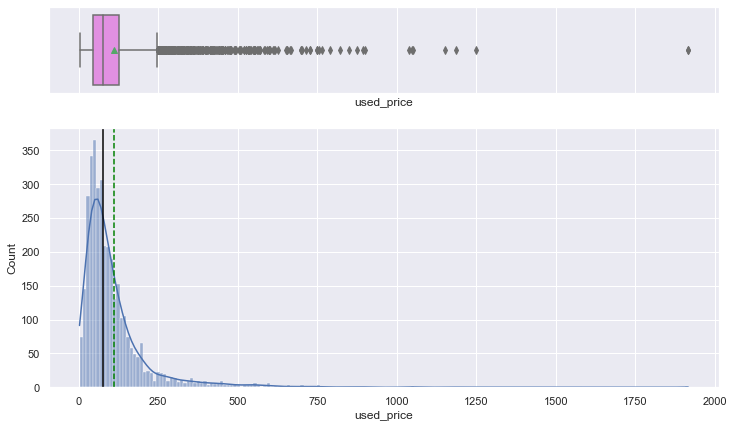

<IPython.core.display.Javascript object>

In [10]:
# Plotting the distribution of used price
histogram_boxplot(df, "used_price")

#### Observations:
* There are many outliers in the used price data.
* The distribution is skewed to the right.
* Majority of the used phones are in the price range of 0-250 euros.

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### 2. What percentage of the used phone market is dominated by Android devices?

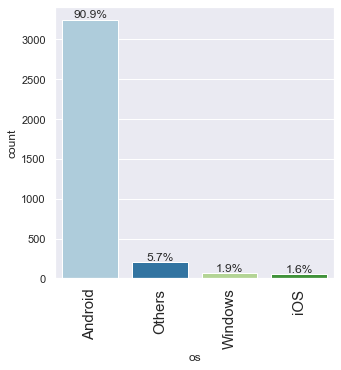

<IPython.core.display.Javascript object>

In [12]:
# Plotting the distribution of os
labeled_barplot(df, "os", perc=True)

#### Observations:
* 90.9% of the used phone market is dominated by Android devices.
* Only 1.6% of iOS devices are available in used phone market and 1.9% of Windows devices.

### 3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?

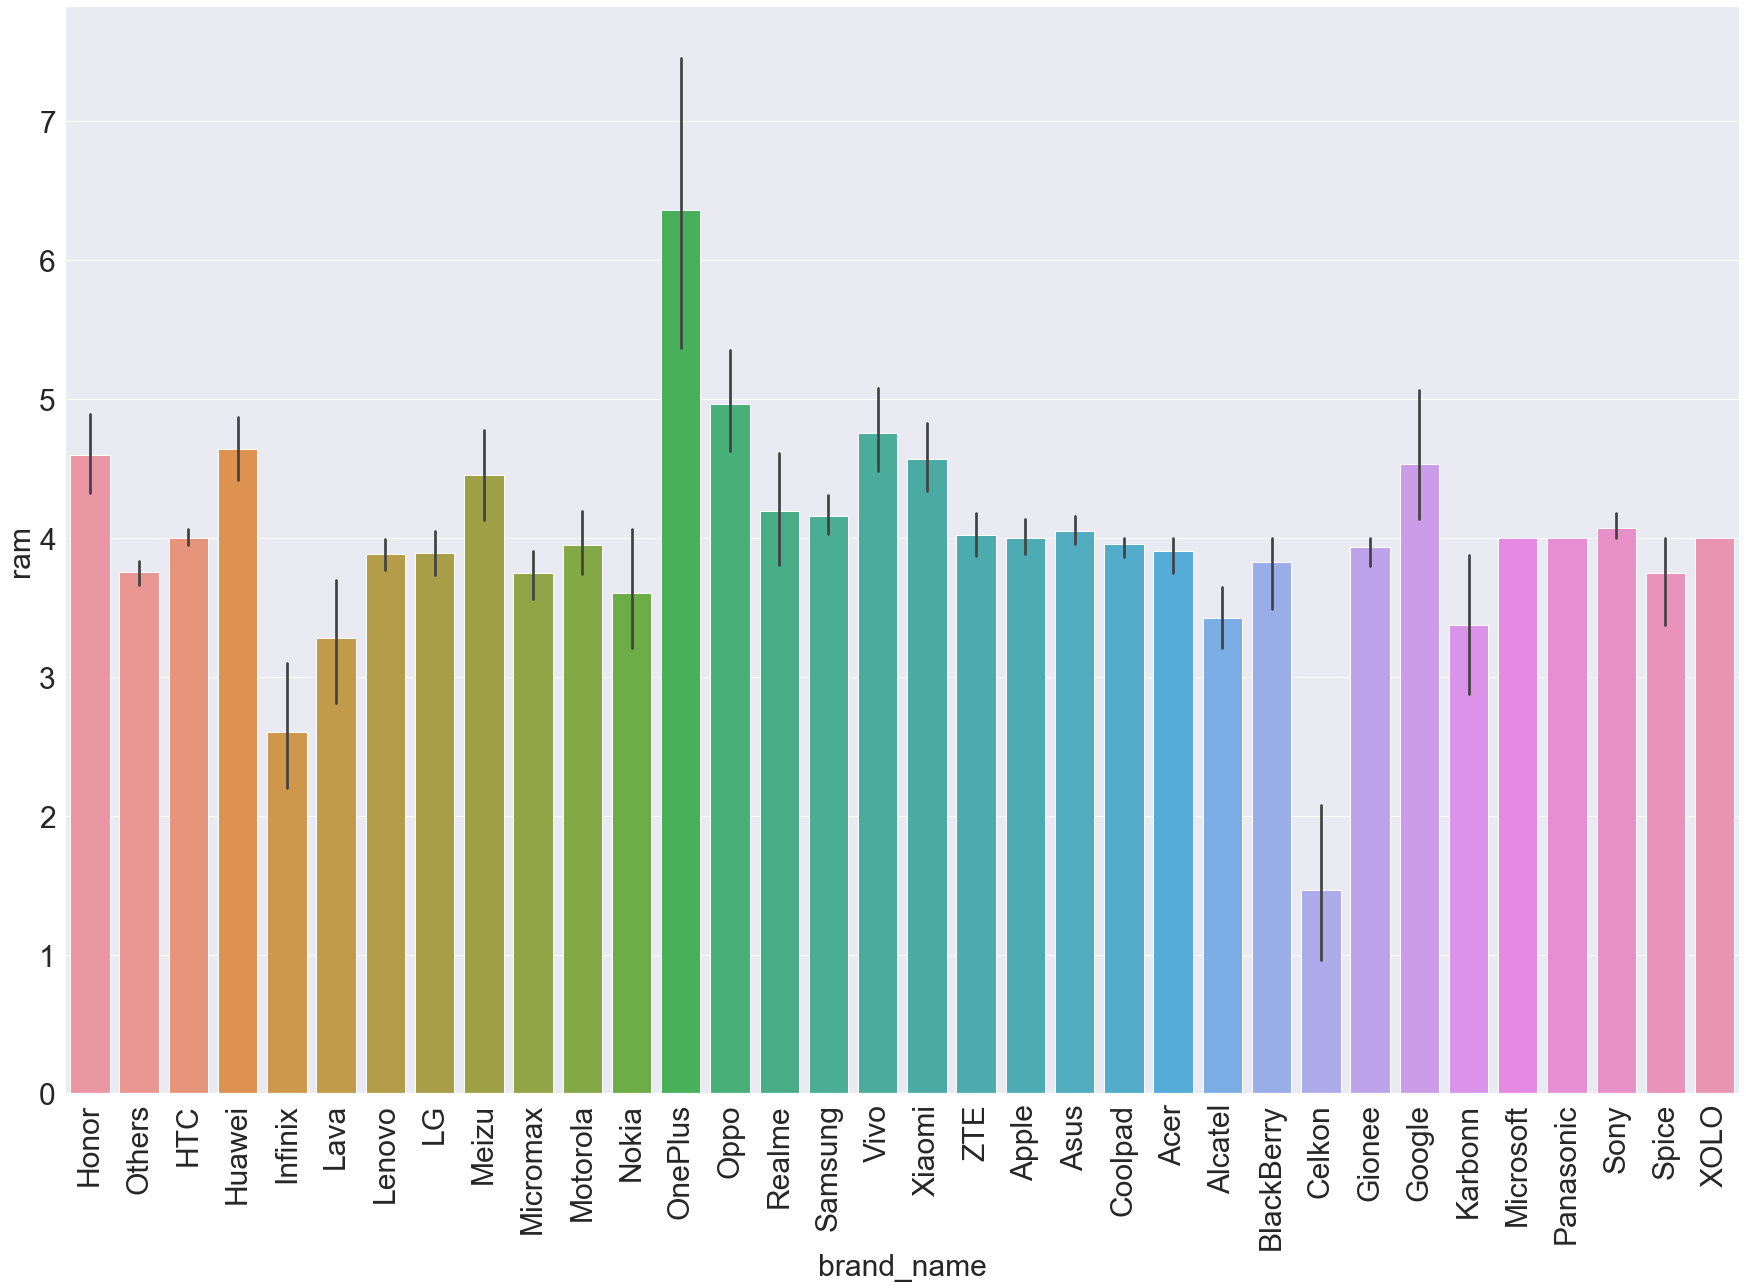

<IPython.core.display.Javascript object>

In [13]:
plt.figure(figsize=(30, 20))
sns.barplot(
    data=df, x="brand_name", y="ram",
)  # to plot a barplot to show the distribution of RAM for each brand
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("brand_name", loc="center", fontsize=30)
plt.ylabel("ram", loc="center", fontsize=30)
plt.show()  # show the plot

#### Observations:
* OnePlus brand has the highest mean RAM, followed by the brand Oppo.
* Celkon brand has the least RAM.

### 4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?

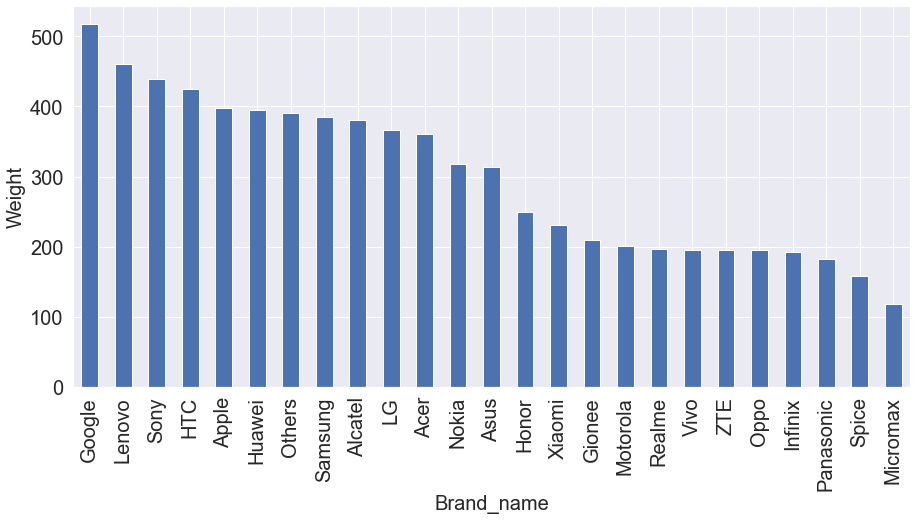

<IPython.core.display.Javascript object>

In [14]:
# Plot to show how the weight vary for phones offering large batteries (more than 4500 mAh)

# creating a dataframe with battery more than 4500 mAh
df_4500battery = df[df.battery > 4500]

# plotting the distribution of weight for phones with battery > 4500
plt.figure(figsize=(15, 7))

df_4500battery.groupby("brand_name")["weight"].mean().sort_values(ascending=False).plot(
    x="brand_name", y="weight", kind="bar"
)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Brand_name", loc="center", fontsize=20)
plt.ylabel("Weight", loc="center", fontsize=20)
plt.show()  # show the plot

#### Observations:
* The scatter plot shows clearly that as the battery increases the weight also increases.
* Google phones have a mean weight of more than 500gms followed by Lenovo, Sony and HTC with a mean weight of more than 400gms.
* Micromax offers lighter phones with battery greater than 4500mAh

### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?

The number of phones across each brand with screen size greater than 6 inches are:
Huawei        159
Samsung       128
Others        116
Honor          87
Vivo           86
Xiaomi         85
Lenovo         72
Oppo           70
LG             68
Motorola       44
Asus           44
Realme         40
Nokia          28
Alcatel        28
Meizu          25
Apple          24
ZTE            22
Acer           19
OnePlus        16
Sony           14
Micromax       11
Infinix        10
HTC             8
Gionee          7
Google          4
XOLO            4
Coolpad         3
Lava            2
BlackBerry      2
Spice           2
Panasonic       2
Celkon          2
Karbonn         2
Microsoft       1
Name: brand_name, dtype: int64


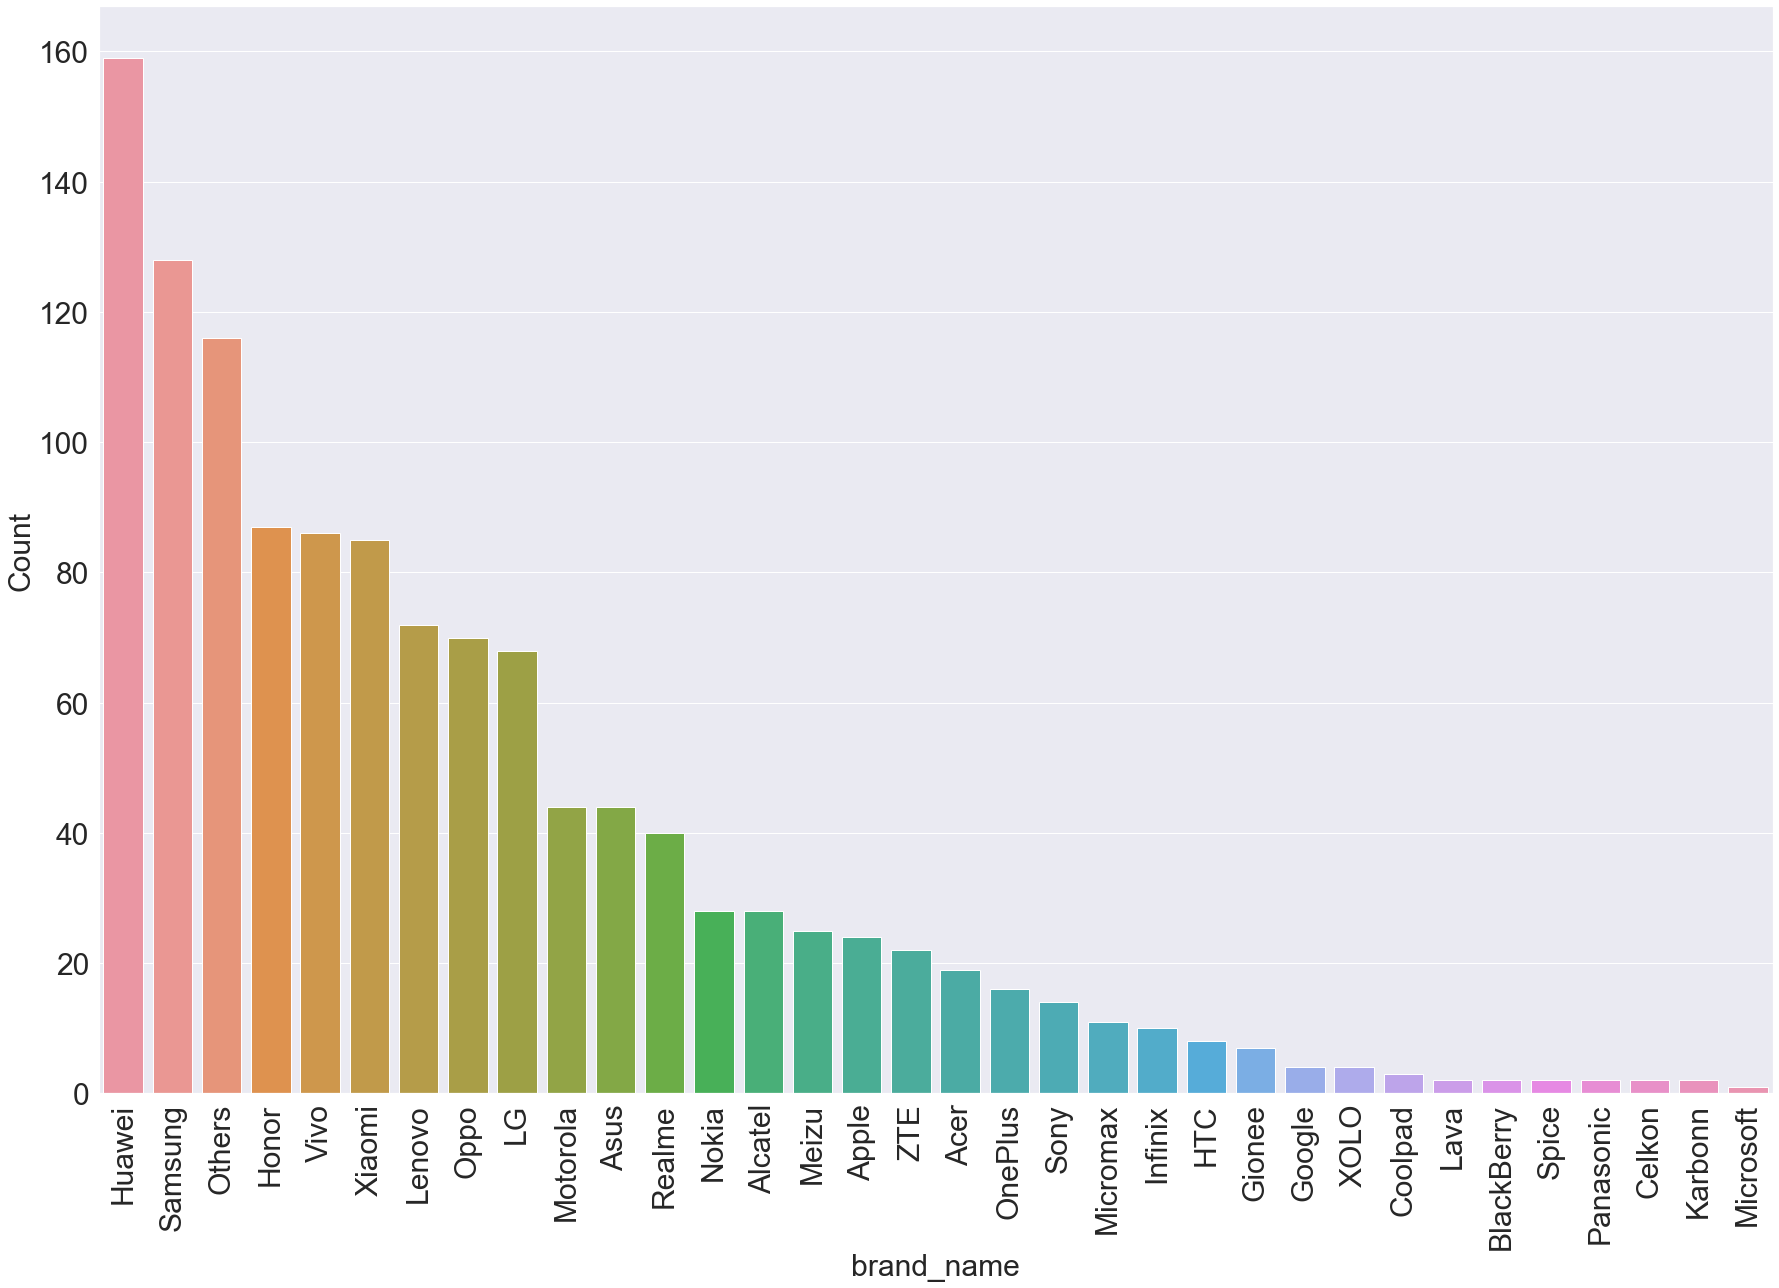

<IPython.core.display.Javascript object>

In [15]:
df_sz = df[
    df.screen_size > 15.24
]  # creating a dataframe with screen size greater than 6 inches. 6inches = 15.24cms
print(
    f"The number of phones across each brand with screen size greater than 6 inches are:\n{df_sz.brand_name.value_counts()}"
)

# plotting the distribution of phones across different brands with a screen size larger than 6 inches
plt.figure(figsize=(30, 20))
sns.countplot(
    data=df_sz, x="brand_name", order=df_sz["brand_name"].value_counts().index
)
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("brand_name", loc="center", fontsize=30)
plt.ylabel("Count", loc="center", fontsize=30)
plt.show()  # show the plot

#### Observations:
* Huawei offers the most number of phones with screen size greater than 6 inches, followed by Samsung.

### 6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

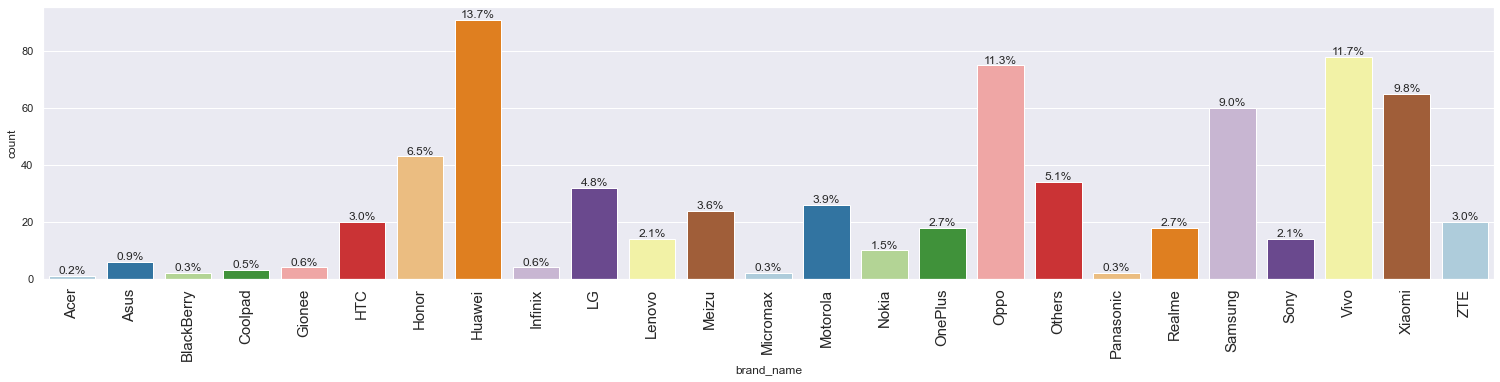

<IPython.core.display.Javascript object>

In [16]:
df_selfie = df[df.selfie_camera_mp > 8]
# df_selfie.groupby("brand_name")["selfie_camera_mp"].mean().plot(
#     x="brand_name", kind="bar", figsize=(15, 7)
# )
labeled_barplot(df_selfie, "brand_name",perc=True)


#### Observations:
* Huawei brand offers the most number of phones with selfie camera greater than 8 MP.
* Oppo and Vivo brands follows Huawei brand offering 11.3% and 11.7% of phones with selfie_camera_mp > 8MP.

### 7. Which attributes are highly correlated with the used phone price?

In [17]:
df.corr()["used_price"]  # list the correlation value of used_price with other variables

screen_size         0.385928
main_camera_mp      0.281065
selfie_camera_mp    0.497530
int_memory          0.404913
ram                 0.522659
battery             0.363767
weight              0.170654
release_year        0.456764
days_used          -0.470760
new_price           0.926087
used_price          1.000000
Name: used_price, dtype: float64

<IPython.core.display.Javascript object>

* The new_price is highly correlated with used phone price with a correlation of 0.926087.

### Univariate Analysis

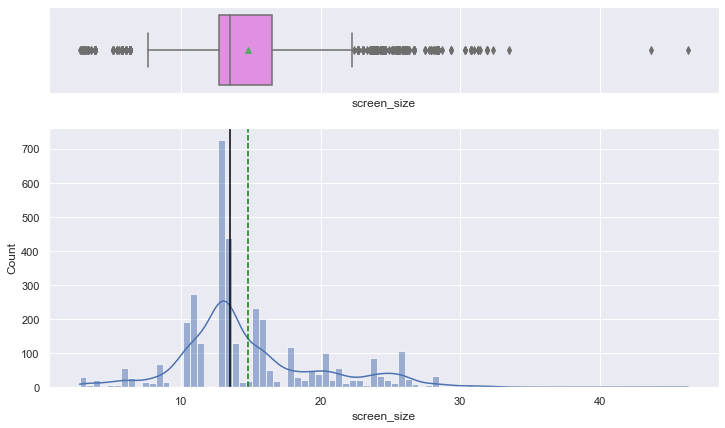

<IPython.core.display.Javascript object>

In [18]:
# Plotting the distribution of screen_size
histogram_boxplot(df, "screen_size")

#### Observations:
* There are many outliers in the data of screen_size
* Most of the data is distributed in a range of less than 30cms

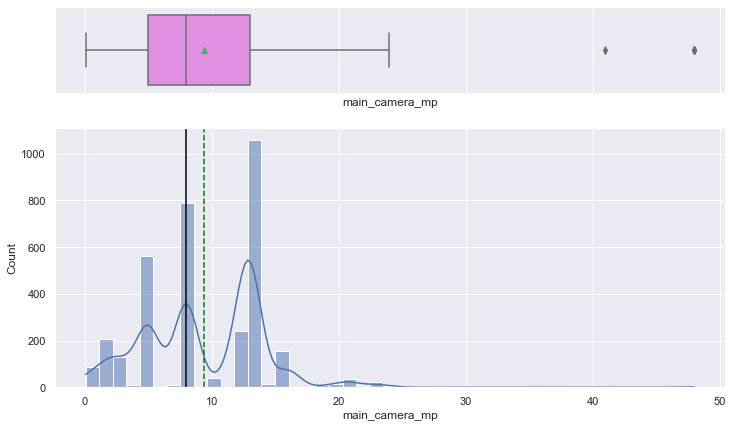

<IPython.core.display.Javascript object>

In [19]:
# Plotting the distribution of main_camera_mp
histogram_boxplot(df, "main_camera_mp")

#### Observations:
* The data is distributed in a range of 0 to 48 megapixels
* There are a couple of outliers in the distribution.

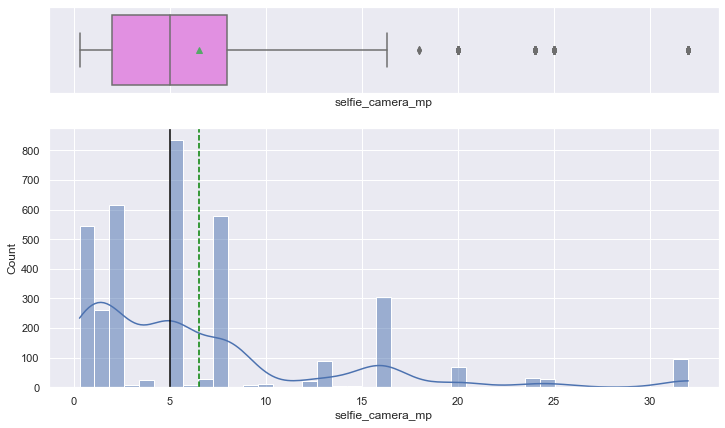

<IPython.core.display.Javascript object>

In [20]:
# Plotting the distribution of selfie_camera_mp
histogram_boxplot(df, "selfie_camera_mp")

#### Observations:
* The data is skewed to the right
* There are few outliers in the distribution.

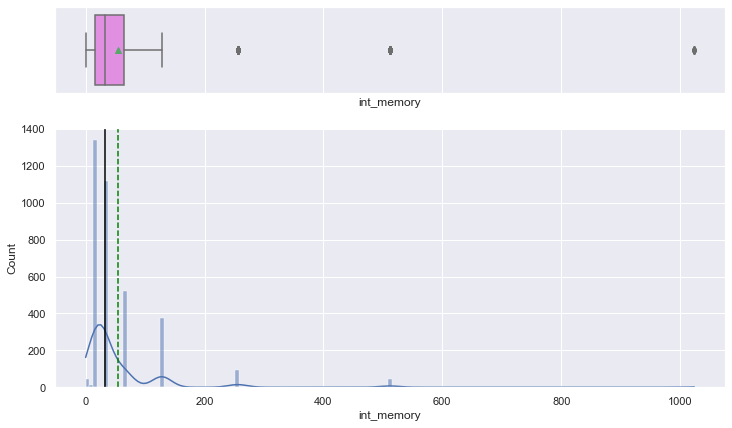

<IPython.core.display.Javascript object>

In [21]:
# Plotting the distribution of int_memory
histogram_boxplot(df, "int_memory")

#### Observations:
* The data is highly skewed to the right indicating the existence of extreme values.
* There are few outliers in the distribution.

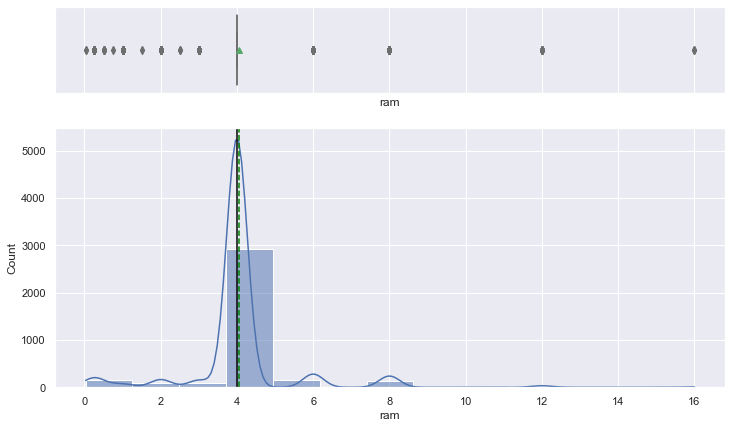

<IPython.core.display.Javascript object>

In [22]:
# Plotting the distribution of ram
histogram_boxplot(df, "ram")

#### Observations:
* Mosts of the cell phones offer a ram of 4gb
* There are many outliers in the distribution.

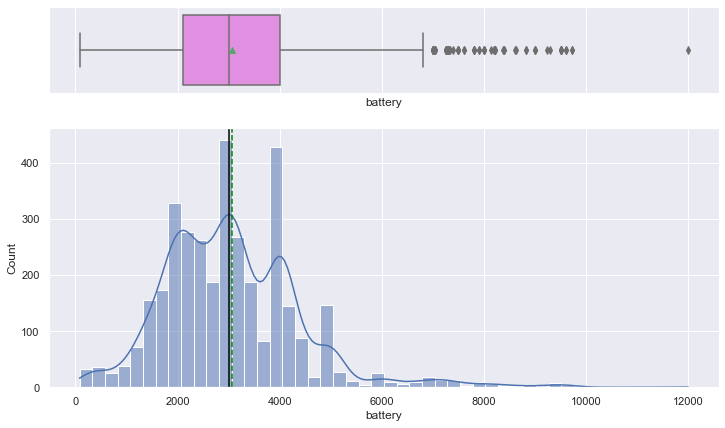

<IPython.core.display.Javascript object>

In [23]:
# Plotting the distribution of battery
histogram_boxplot(df, "battery")

#### Observations:
* There are many outliers in this distribution of battery.
* The data is skewed to the right.

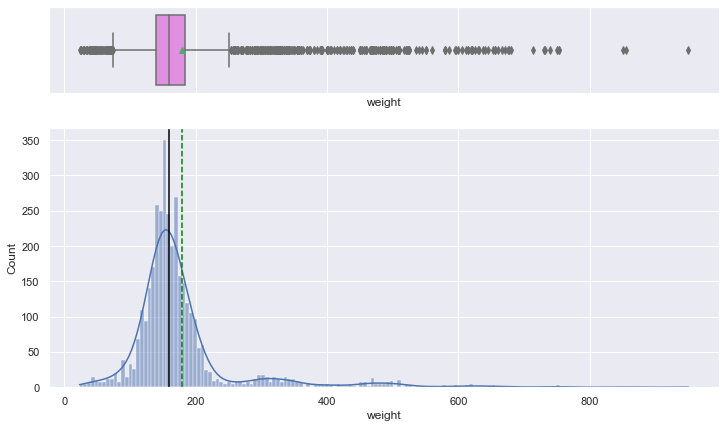

<IPython.core.display.Javascript object>

In [24]:
# Plotting the distribution of weight
histogram_boxplot(df, "weight")

#### Observations:
* There are many outliers in this distribution of weight.
* The data is skewed to the right.

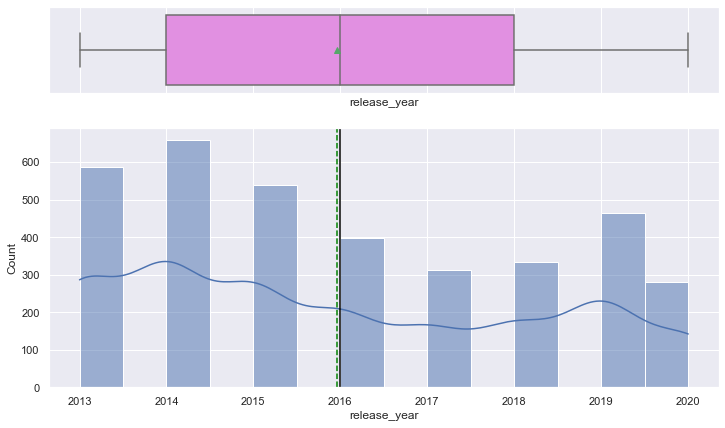

<IPython.core.display.Javascript object>

In [25]:
# Plotting the distribution of release_year
histogram_boxplot(df, "release_year")

#### Observations:
* release_year is distributed from 2013 to 2020.
* There were more releases in the year of 2014 followed by 2013 and 2015.

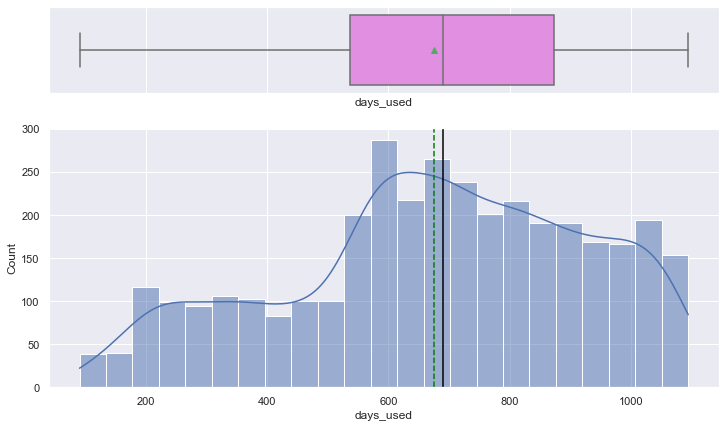

<IPython.core.display.Javascript object>

In [26]:
# Plotting the distribution of days_used
histogram_boxplot(df, "days_used")

#### Observations:
* The data of days_used does not have any outliers.
* days_used data ranges from ~100-1500 days

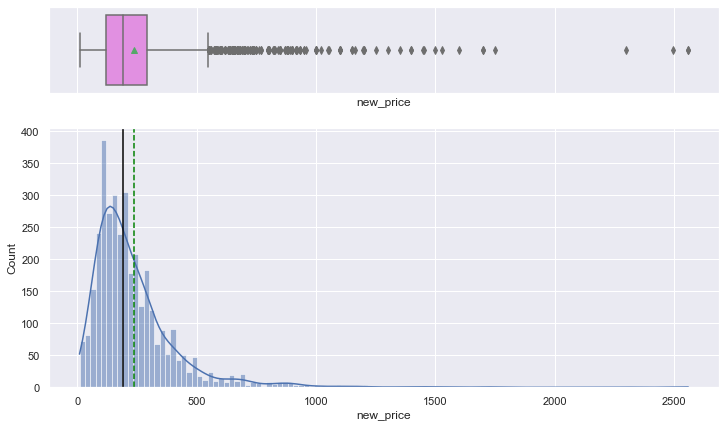

<IPython.core.display.Javascript object>

In [27]:
# Plotting the distribution of new_price
histogram_boxplot(df, "new_price")

#### Observations:
* The new_price data is skewed to the right.
* There are many outliers in the distribution.

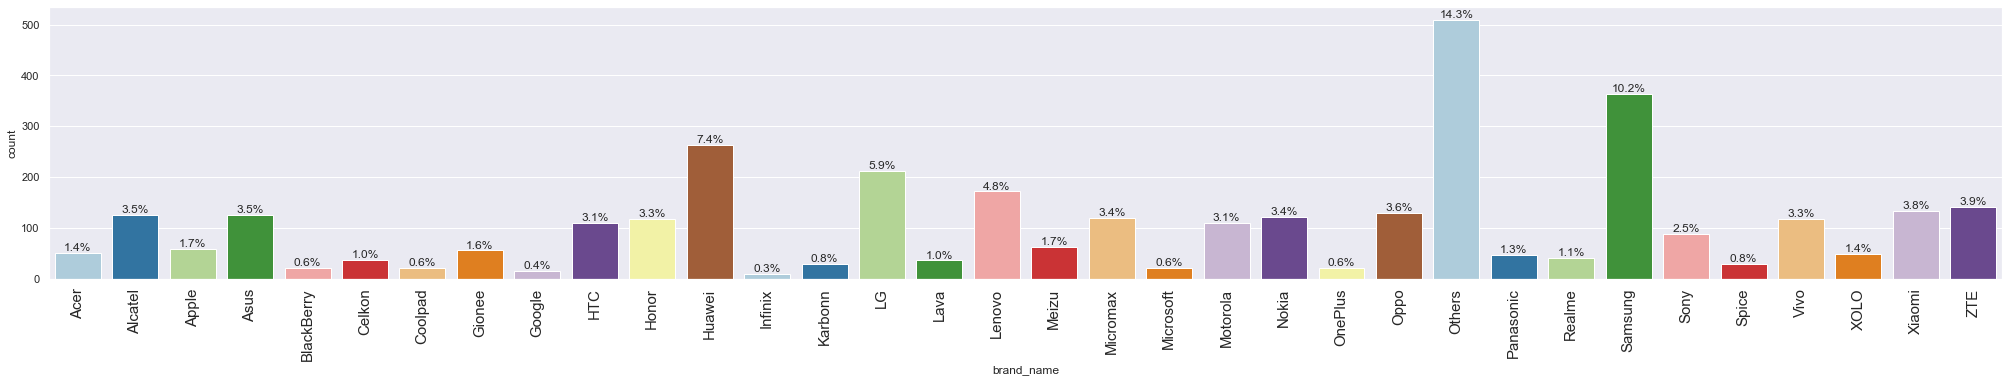

<IPython.core.display.Javascript object>

In [28]:
# Plotting the distribution of brand_name
labeled_barplot(df, "brand_name", perc=True)

#### Observations:
* Others occupy 14.3%, Samsung-10.2% and Huawei-7.4% of used phone market.

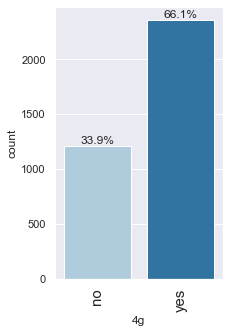

<IPython.core.display.Javascript object>

In [29]:
# Plotting the distribution of 4g
labeled_barplot(df, "4g", perc=True)

#### Observations:
* 66.1% of used phones have 4g option.

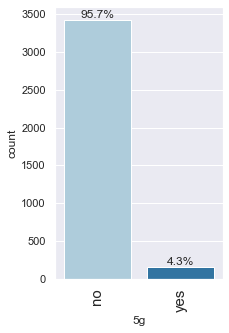

<IPython.core.display.Javascript object>

In [30]:
# Plotting the distribution of 5g
labeled_barplot(df, "5g", perc=True)

#### Observations:
* 95.7% of cell phones does not have 5g option.

## <a name = 'link5'>Data Preprocessing</a>

In [31]:
# Checking for any duplicate rows in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

#### Observations:
* There are no duplicate rows in the data.

## <a name = 'link6'>Missing Value Treatment</a>

In [32]:
# checking for missing values
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
* There are 180 missing values for main_camera_mp, 10 values for int_memory and ram, 6 for battery and 7 for weight.

In [33]:
medianFiller = lambda x: x.fillna(
    x.median()
)  # lambda function to fill with median value for null values
numeric_columns = df.select_dtypes(
    include=np.number
).columns.tolist()  # list of numerical columns
df[numeric_columns] = df[numeric_columns].apply(
    medianFiller, axis=0
)  # applying medianFiller lambda function to all numeric columns

<IPython.core.display.Javascript object>

In [34]:
# checking for missing values
df.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

<IPython.core.display.Javascript object>

All the missing values have been treated.

##  <a name = 'link7'>Feature Engineering</a>

In [35]:
# Converting screen size from cms to inches
def screen_to_inch(screen_size):
    """
        Convert screen size from cms to inches
        1 cm = 0.393701 inches
    """
    return screen_size * 0.393701


df["screen_size"] = df["screen_size"].map(screen_to_inch)


<IPython.core.display.Javascript object>

In [36]:
# Binning screen_size into 4 bins
df["screen_size_bin"] = pd.cut(
    df["screen_size"],
    [-np.inf, 6, 8, 10, np.inf],
    labels=["Under_6inch", "6-8inch", "8-10inch", "10+inch"],
)
df.drop(
    ["screen_size"], axis=1, inplace=True
)  # dropping the screen_size column after binning it
df[
    "screen_size_bin"
].value_counts()  # checking the count of values in each bin for screen_size_bin

Under_6inch    2207
6-8inch         765
8-10inch        387
10+inch         212
Name: screen_size_bin, dtype: int64

<IPython.core.display.Javascript object>

In [37]:
df.sample(n=10, random_state=1)  # check the sample of the data

,brand_name,os,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,screen_size_bin
2501,Samsung,Android,yes,no,13.0,13.0,32.0,4.00,3600.0,181.0,2017,683,198.680,79.47,Under_6inch
2782,Sony,Android,yes,no,8.0,8.0,32.0,4.00,3300.0,156.0,2019,195,198.150,149.10,Under_6inch
605,Others,Android,yes,no,8.0,5.0,16.0,4.00,2400.0,137.0,2015,1048,161.470,48.39,Under_6inch
2923,Vivo,Android,yes,no,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,211.880,138.31,6-8inch
941,Others,Others,no,no,0.3,0.3,32.0,0.25,820.0,90.0,2013,883,29.810,8.92,Under_6inch
1833,LG,Android,no,no,8.0,1.3,32.0,4.00,3140.0,161.0,2013,670,240.540,96.18,Under_6inch
671,Apple,iOS,yes,no,12.0,7.0,64.0,4.00,5493.0,48.0,2018,403,700.150,350.08,Under_6inch
1796,LG,Android,yes,no,5.0,0.3,16.0,4.00,4000.0,294.8,2014,708,189.300,75.94,6-8inch
757,Asus,Android,yes,no,13.0,8.0,32.0,4.00,5000.0,181.0,2017,612,270.500,108.13,Under_6inch
3528,Realme,Android,yes,no,8.0,16.0,64.0,4.00,4035.0,184.0,2019,433,159.885,80.00,6-8inch


<IPython.core.display.Javascript object>

## <a name = 'link15'>EDA (contd..)</a>

- It is a good idea to explore the data once again after manipulating it.

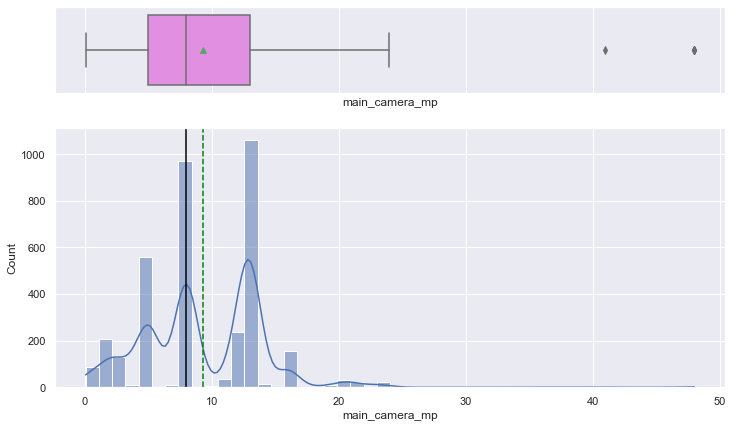

<IPython.core.display.Javascript object>

In [38]:
# Plotting the distribution of main_camera_mp after treating the missing value
histogram_boxplot(df, "main_camera_mp")

#### Observations:
* The data is still skewed to the right.
* There are couple of outliers in the distribution.

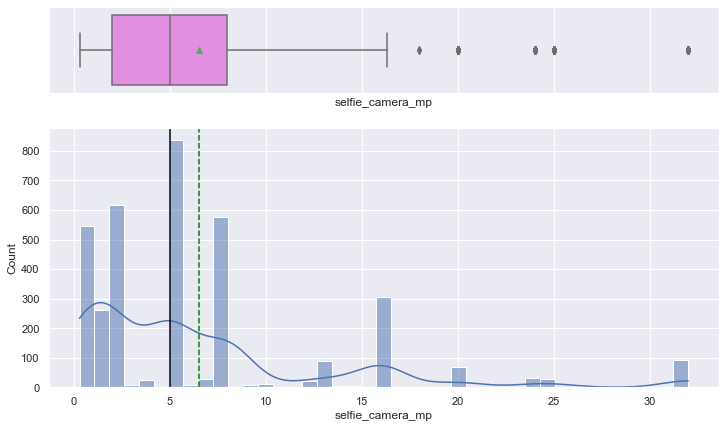

<IPython.core.display.Javascript object>

In [39]:
# Plotting the distribution of selfie_camera_mp after treating the missing value
histogram_boxplot(df, "selfie_camera_mp")

#### Observations:
* The distribution is skewed.
* There are few outliers in the distribution.

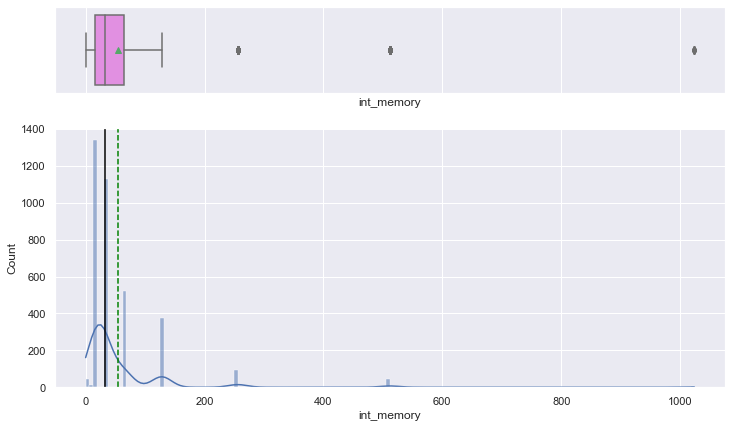

<IPython.core.display.Javascript object>

In [40]:
# Plotting the distribution of int_memory after treating the missing value
histogram_boxplot(df, "int_memory")

#### Observations:
* The distribution is right skewed.
* There are few outliers in the distribution.

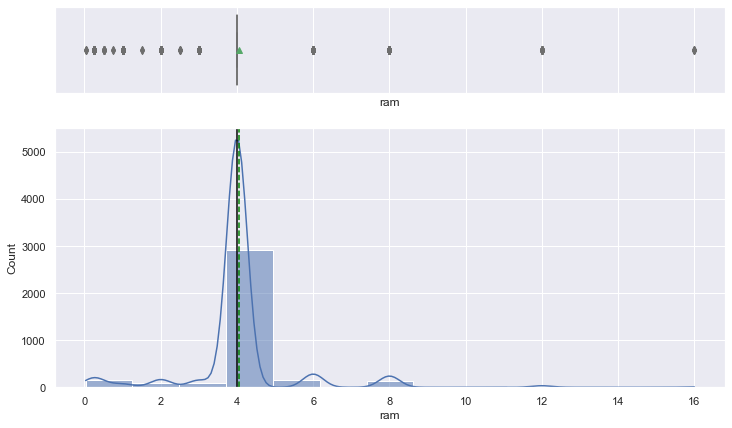

<IPython.core.display.Javascript object>

In [41]:
# Plotting the distribution of ram after treating the missing value
histogram_boxplot(df, "ram")

#### Observations:
* Most of the phones have RAM of 4 gb.
* There are many outliers in the distribution.

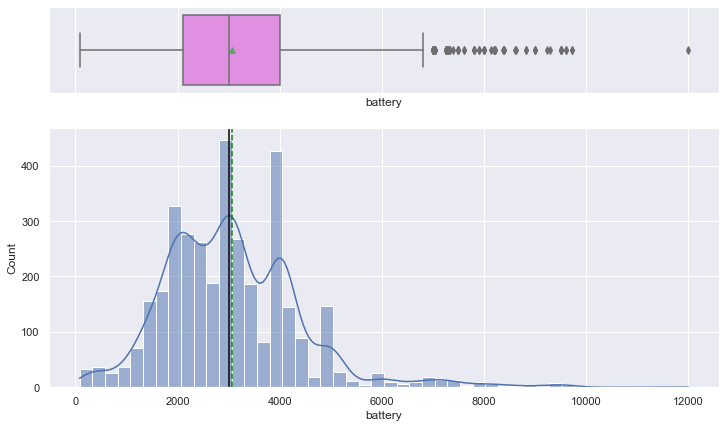

<IPython.core.display.Javascript object>

In [42]:
# Plotting the distribution of battery after treating the missing value
histogram_boxplot(df, "battery")

#### Observations:
* The distribution is skewed to the right.
* There are many outliers in the distribution.

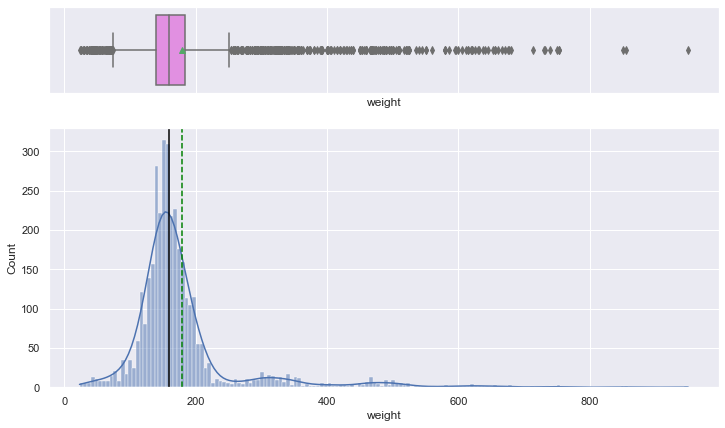

<IPython.core.display.Javascript object>

In [43]:
# Plotting the distribution of weight after treating the missing value
histogram_boxplot(df, "weight")

#### Observations:
* The distribution is skewed to the right.
* There are many outliers in the distribution.

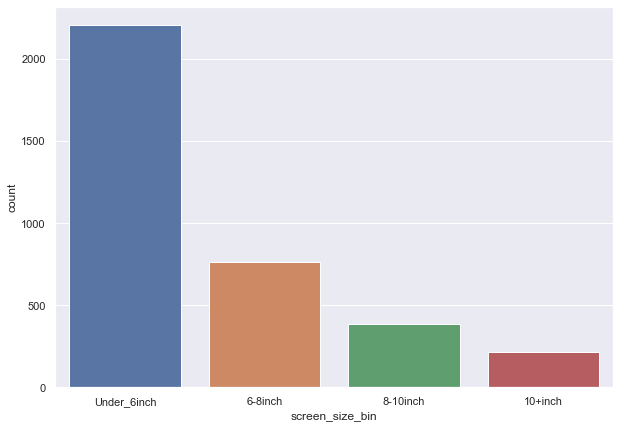

<IPython.core.display.Javascript object>

In [44]:
# Plot to show the distribution of screen_size_bin

plt.figure(figsize=(10, 7))
sns.countplot(x="screen_size_bin", data=df)
plt.show()

#### Observations:
* Majority of the cell phones have less than 6 inches of screen size.
* There are only few cell phones that have screen size of 10+ inches.

### Bivariate Analysis

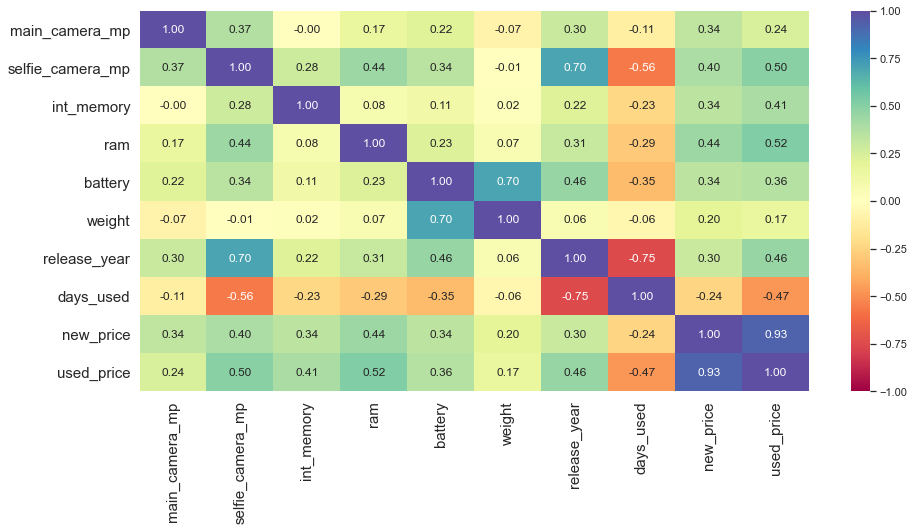

<IPython.core.display.Javascript object>

In [45]:
# Ploting the heatmap to check the correlation between the variables
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Observations:
* Used price is highly correlated with new_price with a correlation rate of 0.93
* days_used and released_year have a correlation of -0.75.
* weight and battery have a correlation of 0.70

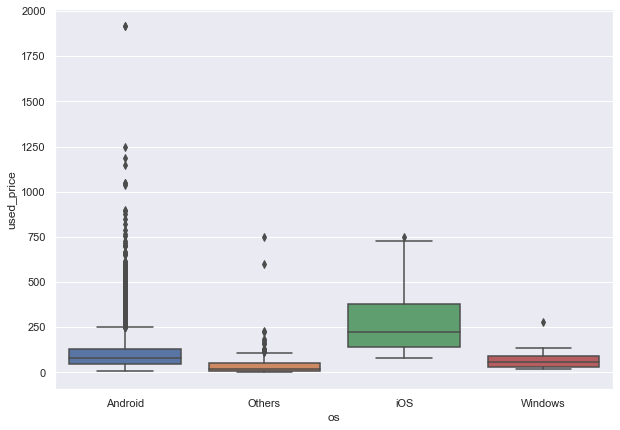

<IPython.core.display.Javascript object>

In [46]:
# Plot to show used_price distribution for each os type

plt.figure(figsize=(10, 7))
sns.boxplot(y="used_price", x="os", data=df)
plt.show()

#### Observations:
* The mean used_price for iOS devices is more.
* But the outliers in the Android devices indicate that there are highly priced Android devices in the market.

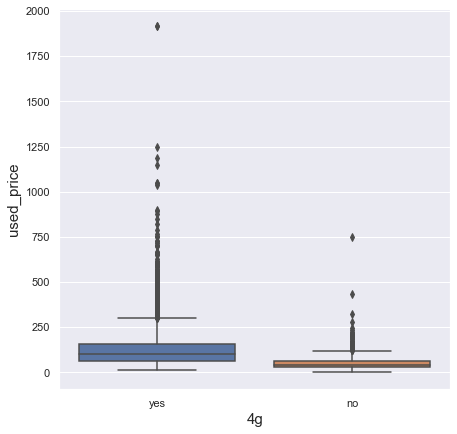

<IPython.core.display.Javascript object>

In [47]:
# Plot to show the distribution of used_price for 4g phones
plt.figure(figsize=(7, 7))
sns.boxplot(y="used_price", x="4g", data=df)
plt.xlabel("4g", fontsize=15)
plt.ylabel("used_price", fontsize=15)
plt.show()

#### Observations:
* The mean used price for cell phones with 4g option is ~100 euros.

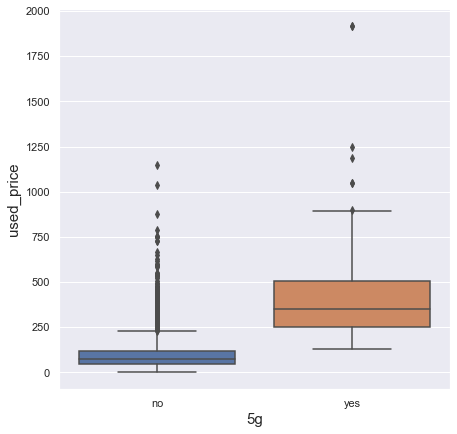

<IPython.core.display.Javascript object>

In [48]:
# Plot to show the distribution of used_price for 5g phones
plt.figure(figsize=(7, 7))
sns.boxplot(y="used_price", x="5g", data=df)
plt.xlabel("5g", fontsize=15)
plt.ylabel("used_price", fontsize=15)
plt.show()

#### Observations:
* The mean used price for cell phones with 5g option is ~300 dollars.

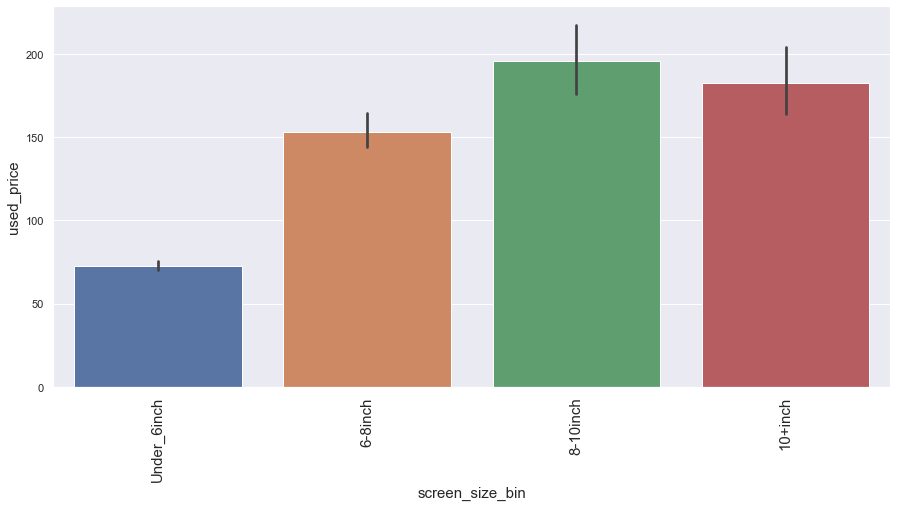

<IPython.core.display.Javascript object>

In [49]:
# Plot to show the screen_size_bin and used_price for phones with 5g option
plt.figure(figsize=(15, 7))
sns.barplot(data=df, x="screen_size_bin", y="used_price")
plt.xticks(rotation=90, fontsize=15)
plt.xlabel("screen_size_bin", fontsize=15)
plt.ylabel("used_price", fontsize=15)
plt.show()

#### Observations:
* Cell phones with 8+ inches have higher price ranges than phones with screen size less than 6 inches.

#### Converting the object type columns to category type

In [50]:
df["brand_name"] = df["brand_name"].astype(
    "category"
)  # converting the variable 'brand_name' from object to category type
df["os"] = df["os"].astype(
    "category"
)  # converting the variable 'os' from object to category type
df["4g"] = df["4g"].astype(
    "category"
)  # converting the variable '4g' from object to category type
df["5g"] = df["5g"].astype(
    "category"
)  # converting the variable '5g' from object to category type
df.dtypes  # check the datatype of all variables

brand_name          category
os                  category
4g                  category
5g                  category
main_camera_mp       float64
selfie_camera_mp     float64
int_memory           float64
ram                  float64
battery              float64
weight               float64
release_year           int64
days_used              int64
new_price            float64
used_price           float64
screen_size_bin     category
dtype: object

<IPython.core.display.Javascript object>

## <a name = 'link8'>Detecting Outliers</a>


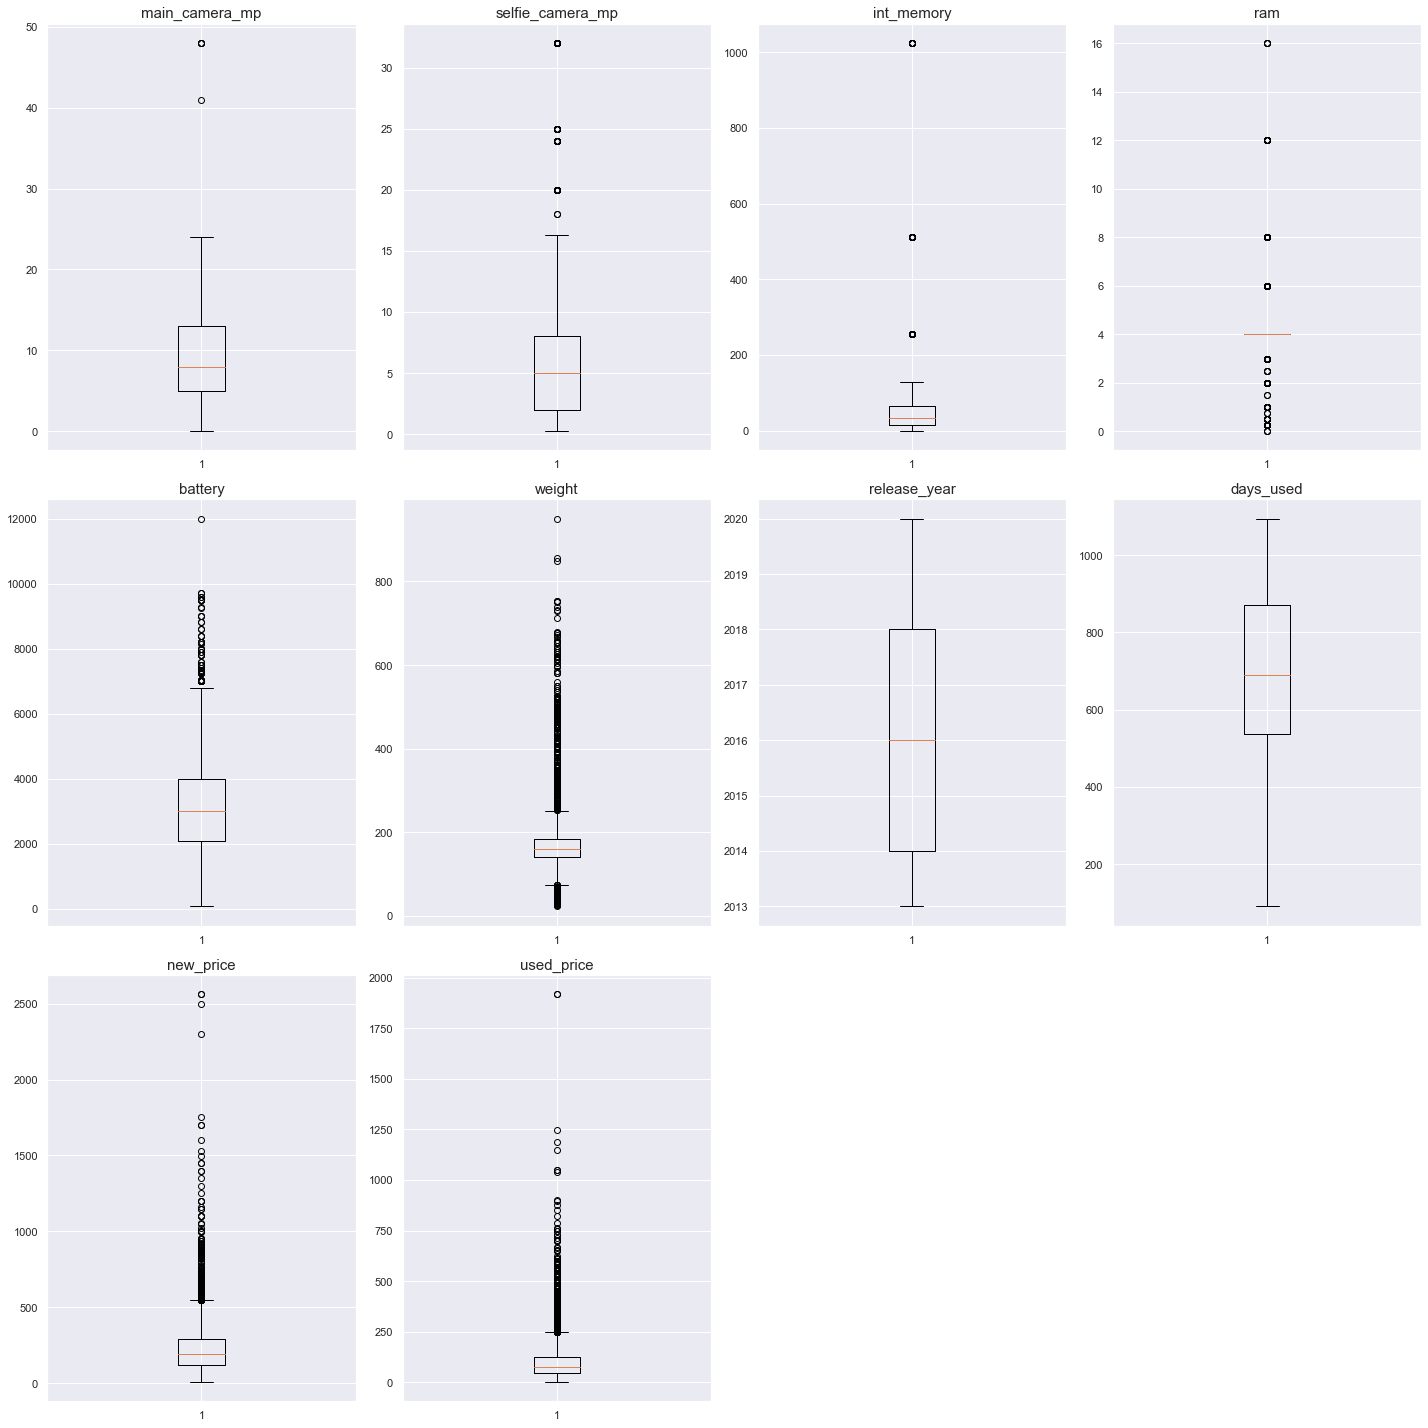

<IPython.core.display.Javascript object>

In [51]:
# let's plot the boxplots of all continuous variables to check for outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 20))
for i, variable in enumerate(numerical_col):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable, fontsize=15)

plt.show()

#### Observations:
* weight column has upper and lower outliers
* batter, new_price and used_price have only upper outliers
* no outliers for days_used and release_year
* main_camera_mp, selfie_camera_mp, ram and int_memory are discrete values and there is no much difference in model performance by treating these variables for outliers. 

## <a name = 'link9'>Handling Outliers</a>

In [52]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    df: dataframe
    col: str, name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [53]:
outlier_cols = [
    "weight",
    "battery",
    "new_price",
    "used_price",
]  # creating a list of continuous variables to be treated for outliers.
df = treat_outliers_all(df, outlier_cols)

<IPython.core.display.Javascript object>

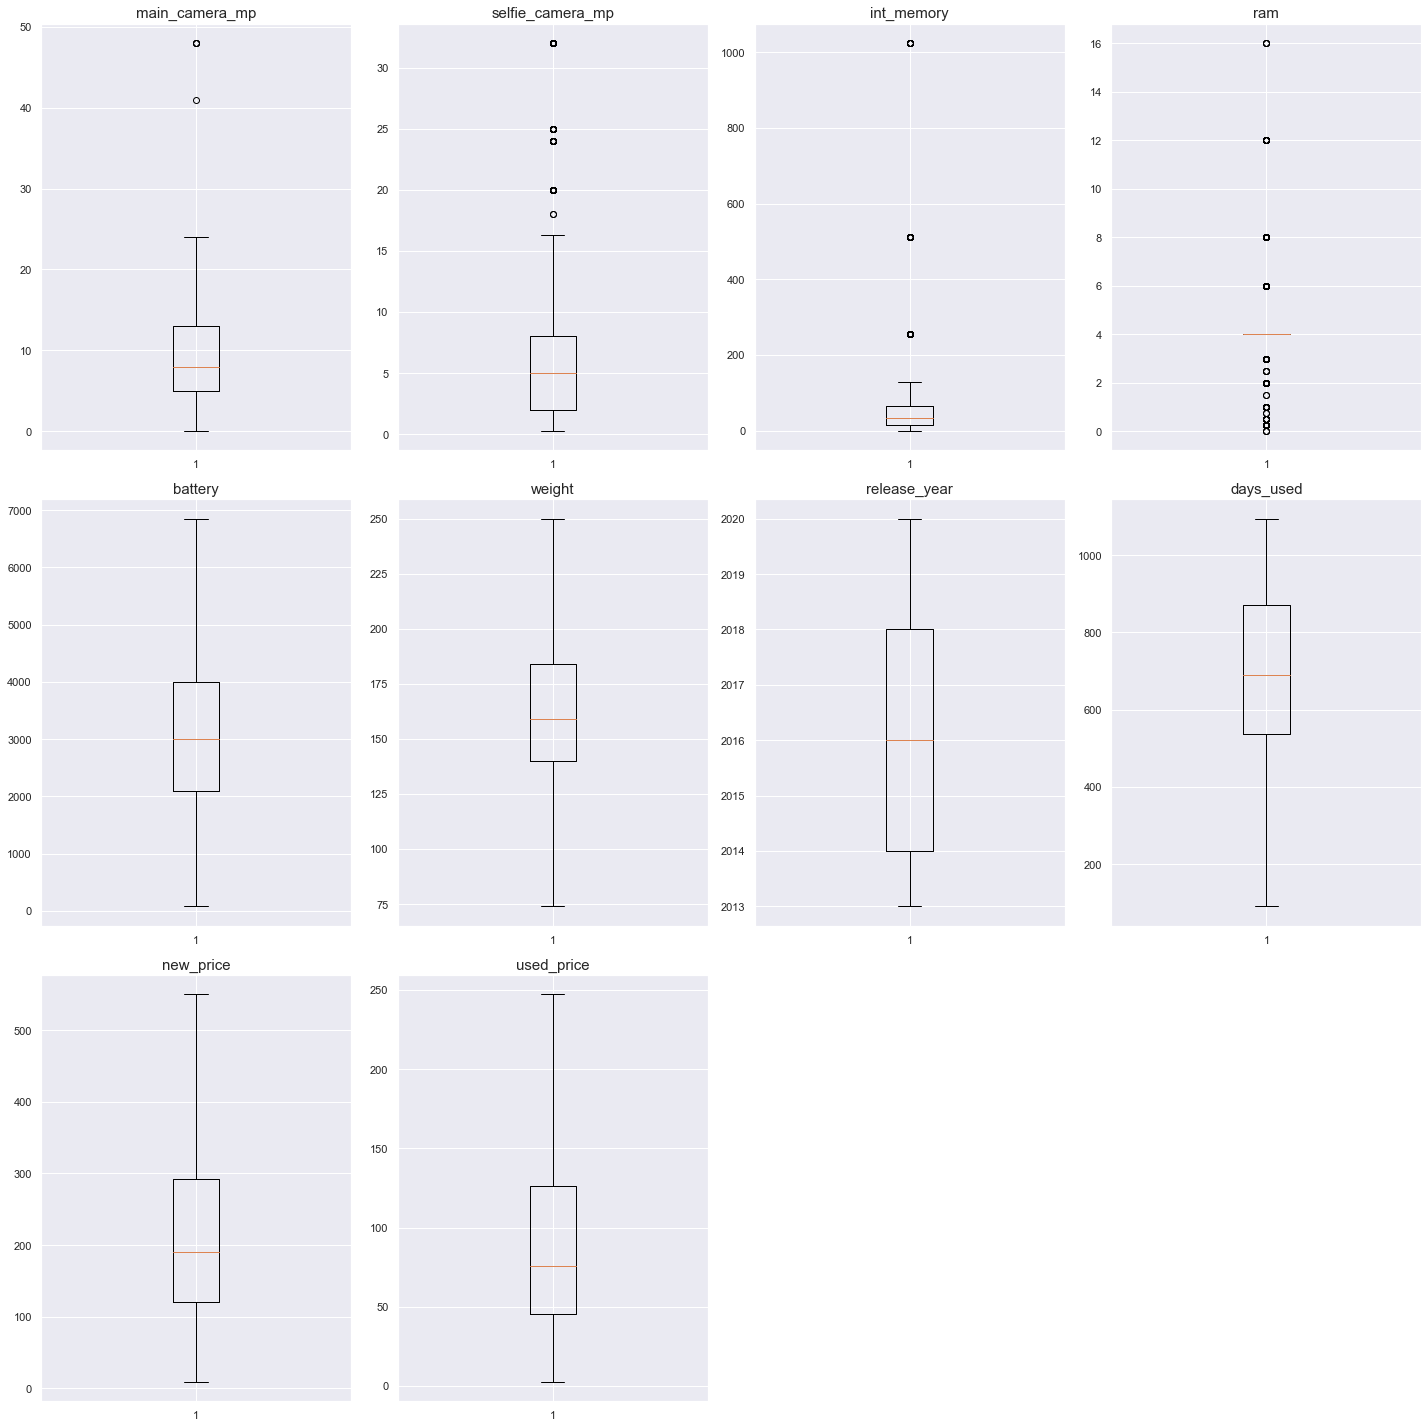

<IPython.core.display.Javascript object>

In [54]:
# let's plot the boxplots of all continuous variables to check for outliers
plt.figure(figsize=(20, 20))
for i, variable in enumerate(numerical_col):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable, fontsize=15)

plt.show()

#### Observations:
* All the continous variables have been treated for outliers.

## <a name = 'link16'>Variable Transformation</a>
From EDA, the distribution of int_memory is found to be highly skewed. Hence, applying log transformation to this variable to improve performance.

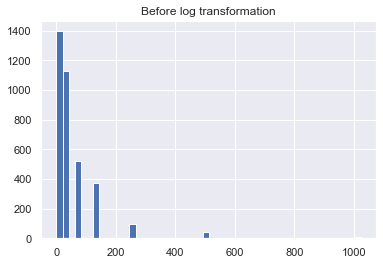

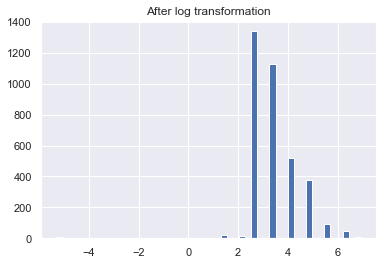

<IPython.core.display.Javascript object>

In [55]:
# Plotting the distribution before and after log transformation of int_memory

plt.hist(df["int_memory"], bins=50)
plt.title("Before log transformation")
plt.show()

plt.hist(np.log(df["int_memory"]), bins=50)
plt.title("After log transformation")
plt.show()


#### Observation:
* The distribution looks better with log transformation.

In [56]:
df["int_memory" + "_log"] = np.log(
    df["int_memory"]
)  # creating new column applying np.log to int_memory column
df.drop("int_memory", axis=1, inplace=True)  # removing the int_memory column

<IPython.core.display.Javascript object>

## <a name = 'link10'>Building a Linear Regression model</a>


In [57]:
df.sample(n=10, random_state=1)  # check the sample of data

,brand_name,os,4g,5g,main_camera_mp,selfie_camera_mp,ram,battery,weight,release_year,days_used,new_price,used_price,screen_size_bin,int_memory_log
2501,Samsung,Android,yes,no,13.0,13.0,4.00,3600.0,181.0,2017,683,198.6800,79.4700,Under_6inch,3.465736
2782,Sony,Android,yes,no,8.0,8.0,4.00,3300.0,156.0,2019,195,198.1500,149.1000,Under_6inch,3.465736
605,Others,Android,yes,no,8.0,5.0,4.00,2400.0,137.0,2015,1048,161.4700,48.3900,Under_6inch,2.772589
2923,Vivo,Android,yes,no,13.0,16.0,4.00,3260.0,149.3,2019,375,211.8800,138.3100,6-8inch,4.158883
941,Others,Others,no,no,0.3,0.3,0.25,820.0,90.0,2013,883,29.8100,8.9200,Under_6inch,3.465736
1833,LG,Android,no,no,8.0,1.3,4.00,3140.0,161.0,2013,670,240.5400,96.1800,Under_6inch,3.465736
671,Apple,iOS,yes,no,12.0,7.0,4.00,5493.0,74.0,2018,403,549.6425,247.1925,Under_6inch,4.158883
1796,LG,Android,yes,no,5.0,0.3,4.00,4000.0,250.0,2014,708,189.3000,75.9400,6-8inch,2.772589
757,Asus,Android,yes,no,13.0,8.0,4.00,5000.0,181.0,2017,612,270.5000,108.1300,Under_6inch,3.465736
3528,Realme,Android,yes,no,8.0,16.0,4.00,4035.0,184.0,2019,433,159.8850,80.0000,6-8inch,4.158883


<IPython.core.display.Javascript object>

In [58]:
# defining X and y variables
X = df.drop(
    ["brand_name", "used_price"], axis=1
)  # dropping brand_name as it will not impact the performance of the model
y = df["used_price"]

print(X.head())
print("==================================")
print(y.head())

        os   4g   5g  main_camera_mp  selfie_camera_mp  ram  battery  weight  \
0  Android  yes   no            13.0               5.0  3.0   3020.0   146.0   
1  Android  yes  yes            13.0              16.0  8.0   4300.0   213.0   
2  Android  yes  yes            13.0               8.0  8.0   4200.0   213.0   
3  Android  yes  yes            13.0               8.0  6.0   6850.0   250.0   
4  Android  yes   no            13.0               8.0  3.0   5000.0   185.0   

   release_year  days_used  new_price screen_size_bin  int_memory_log  
0          2020        127     111.62        8-10inch        4.158883  
1          2020        325     249.39         10+inch        4.852030  
2          2020        162     359.47        8-10inch        4.852030  
3          2020        345     278.93         10+inch        4.158883  
4          2020        293     140.87         6-8inch        4.158883  
0     86.9600
1    161.4900
2    247.1925
3    180.2300
4    103.8000
Name: used_price,

<IPython.core.display.Javascript object>

In [59]:
# Creating dummies for categorical variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,main_camera_mp,selfie_camera_mp,ram,battery,weight,release_year,days_used,new_price,int_memory_log,os_Others,os_Windows,os_iOS,4g_yes,5g_yes,screen_size_bin_6-8inch,screen_size_bin_8-10inch,screen_size_bin_10+inch
0,13.0,5.0,3.0,3020.0,146.0,2020,127,111.62,4.158883,0,0,0,1,0,0,1,0
1,13.0,16.0,8.0,4300.0,213.0,2020,325,249.39,4.852030,0,0,0,1,1,0,0,1
2,13.0,8.0,8.0,4200.0,213.0,2020,162,359.47,4.852030,0,0,0,1,1,0,1,0
3,13.0,8.0,6.0,6850.0,250.0,2020,345,278.93,4.158883,0,0,0,1,1,0,0,1
4,13.0,8.0,3.0,5000.0,185.0,2020,293,140.87,4.158883,0,0,0,1,0,1,0,0


<IPython.core.display.Javascript object>

#### Observations:
* All the independent variables are converted to numerical values.

In [60]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [61]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


<IPython.core.display.Javascript object>

In [62]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

#### Let's check the coefficients and intercept of the model.

In [63]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
main_camera_mp,-0.171519
selfie_camera_mp,0.718175
ram,0.351562
battery,-0.000177
weight,-0.006189
release_year,-0.059170
days_used,-0.084664
new_price,0.385908
int_memory_log,2.761873
os_Others,-3.142119


<IPython.core.display.Javascript object>

## <a name = 'link11'>Model performance evaluation</a>

In [64]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [65]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.977771,10.27358,0.955024,0.954716,17.990999


<IPython.core.display.Javascript object>

In [66]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.730947,10.086594,0.957532,0.956847,15.702044


<IPython.core.display.Javascript object>

### Observations:
* The training  𝑅2  is 95.5%, indicating that the model explains 95.5% of the variation in the train data. So, the model is not underfitting.
* MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.
* MAE indicates that our current model is able to predict used price within a mean error of 10.2 dollars on the test data.

### <a name = 'link12'>Linear Regression using statsmodels</a>

In [67]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     3099.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:03:46   Log-Likelihood:                -10137.
No. Observations:                2499   AIC:                         2.031e+04
Df Residuals:                    2481   BIC:                         2.041e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<IPython.core.display.Javascript object>

#### Observations:
* main_camera_mp, battery, weight, release_year, days_used, os_Others, os_Windows, 4g_yes, 5g_yes and screen_size_bin_6-8inch have negative coefficient values indicating that the used price decreases with these variables.
* selfie_camera_mp, ram, new_price, int_memory_log, os_iOS, screen_size_bin_8-10inch and screen_size_bin_10+inch have positive correlation values indicating that the used price increases with these variables.
* ram, battery, weight, release_year, os_Windows, 5g_yes, screen_size_bin_6-8inch and screen_size_bin_10+inch have p-values greater than 0.05.

## <a name = 'link13'>Checking Linear Regression Assumptions</a>

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

Following Linear Regression assumptions will be checked:

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

### 1. TEST FOR MULTICOLLINEARITY

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [69]:
checking_vif(x_train1)

,feature,VIF
0,const,3.278293e+06
1,main_camera_mp,1.842170e+00
2,selfie_camera_mp,2.799654e+00
3,ram,1.715025e+00
4,battery,3.700349e+00
5,weight,3.115606e+00
6,release_year,4.256102e+00
7,days_used,2.576071e+00
8,new_price,2.170952e+00
9,int_memory_log,1.443382e+00


<IPython.core.display.Javascript object>

#### Observations:
* All the VIF values are less than 5 and hence the above predictors have no multicollinearity and the assumption is satisfied.

#### As the multicollinearity assumption is satisfied, proceeding to check the p-values in the model. Any variable with p-value > 0.05 is considered not significant. Defining a loop below for picking one variable at a time that has a high p-value, dropping it, and building a model again until there are no columns with p-value > 0.05.

In [70]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'days_used', 'new_price', 'int_memory_log', 'os_Others', 'os_iOS', '4g_yes', 'screen_size_bin_8-10inch', 'screen_size_bin_10+inch']


<IPython.core.display.Javascript object>

In [71]:
x_train2 = x_train1[
    selected_features
]  # creating a new train dataset with variables having p-value < 0.05
x_test2 = x_test1[
    selected_features
]  # creating a new test dataset with variables having p-value < 0.05

<IPython.core.display.Javascript object>

In [72]:
olsmod2 = sm.OLS(y_train, x_train2).fit()  # building a model with new train dataset
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     5273.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:03:46   Log-Likelihood:                -10139.
No. Observations:                2499   AIC:                         2.030e+04
Df Residuals:                    2488   BIC:                         2.036e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<IPython.core.display.Javascript object>

#### Observations:
* Now no feature has p-value greater than 0.05, so the features in x_train2 can be considered as the final ones and olsmod2 as final model.
* Now adjusted R-squared is 0.955, i.e., our model is able to explain ~95% of the variance. This shows that the model is good.
* The adjusted R-squared in olsmod0 (where we considered all the variables) was also 0.955. This shows that the variables we dropped were not affecting the model much.

### 2. TEST FOR LINEARITY AND INDEPENDENCE

In [73]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
844,100.48,101.479262,-0.999262
1539,111.68,116.788632,-5.108632
3452,113.89,115.036674,-1.146674
1727,64.09,70.000839,-5.910839
1926,67.95,67.939488,0.010512


<IPython.core.display.Javascript object>

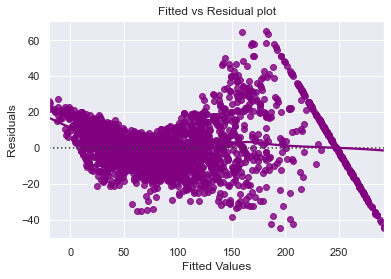

<IPython.core.display.Javascript object>

In [74]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observations:
* The plot between fitted and residual values don't follow any pattern and hence the model can be considered linear and residuals are independent.

### TEST FOR NORMALITY

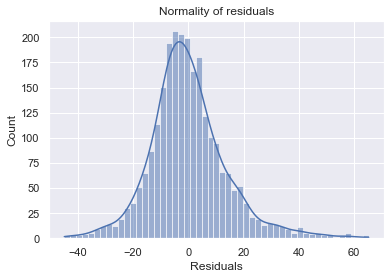

<IPython.core.display.Javascript object>

In [75]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

#### Observation:
* The histogram of residuals does have a bell shape.

#### Q-Q plot

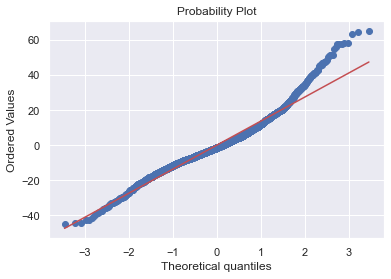

<IPython.core.display.Javascript object>

In [76]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Observations:
* The residuals more or less follow a straight line except for the head.
* Let's check the results of the Shapiro-Wilk test.

In [77]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9624456763267517, pvalue=5.7113342183536265e-25)

<IPython.core.display.Javascript object>

* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* Strictly speaking, the residuals are not normal.
* However, as an approximation, we can accept this distribution as close to being normal.
* So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

In [78]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 1.0330367330430623), ('p-value', 0.2837271970679515)]

<IPython.core.display.Javascript object>

#### Observation:
* Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

#### Now that we have checked all the assumptions of linear regression and they are satisfied, we can move towards the prediction part.

In [79]:
# predictions on the test set
pred = olsmod2.predict(x_test2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
2098,30.5200,22.421126
278,195.6700,198.503020
26,247.1925,218.719895
2910,89.9700,90.777617
2631,69.2000,63.984086
1582,89.5800,110.846334
2110,247.1925,268.741107
3160,65.3400,64.909208
2817,115.7700,106.933192
549,39.2900,47.470046


<IPython.core.display.Javascript object>

* The model has returned pretty good prediction results, and the actual and predicted values are comparable.

* We can also visualize comparison result as a bar graph.

* For representation purpose, taking a sample of 25 records only.

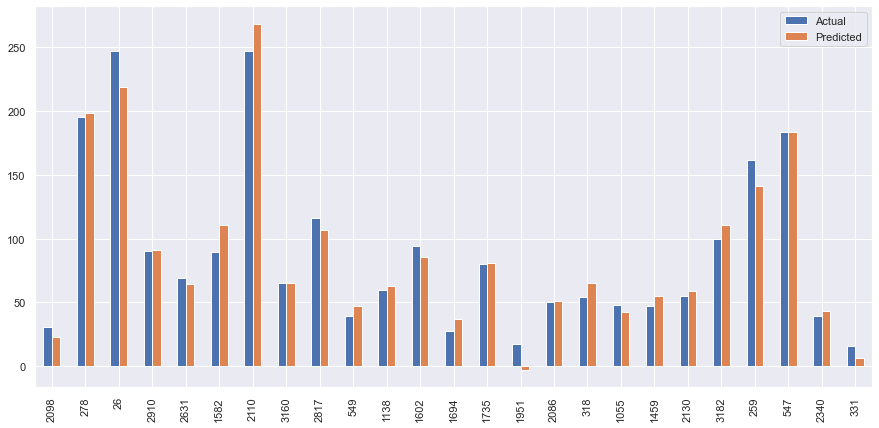

<IPython.core.display.Javascript object>

In [80]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [81]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train2, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.990379,10.27459,0.954943,0.954744,18.003867


<IPython.core.display.Javascript object>

In [82]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test2, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,13.765481,10.111122,0.957318,0.956875,15.716902


<IPython.core.display.Javascript object>

#### Let's compare the initial model created with sklearn and the final statsmodels model.

In [83]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,13.977771,13.990379
MAE,10.273580,10.274590
R-squared,0.955024,0.954943
Adj. R-squared,0.954716,0.954744
MAPE,17.990999,18.003867


<IPython.core.display.Javascript object>

* The performance of the two models is close to each other.

## <a name = 'link14'>Final Model Summary</a>

In [84]:
olsmodel_final = sm.OLS(y_train, x_train2).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     5273.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:03:49   Log-Likelihood:                -10139.
No. Observations:                2499   AIC:                         2.030e+04
Df Residuals:                    2488   BIC:                         2.036e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<IPython.core.display.Javascript object>

#### Observations:
* Adjusted R-squared is 0.955, i.e., the model is able to explain ~95% of the variance. This shows that the model is good.
* As the number of days used increases, the used price decreases with 0.084 euros/day.
* Screen_size of 8+ inches increases the value of the phone.
* Selfie camera with higher megapixels, more internal memory and iOS also increases the rate of the used phone.

## <a name = 'link17'>Actionable Insights and Recommendations</a>

* 90.9% of the used phone market is dominated by Android devices.
* OnePlus brand offers the highest mean RAM, followed by the brand Oppo. Celkon brand has the least RAM.
* Google phones offer large batteries, but the weight of these phones are more than 500gms. Micromax offers lighter phones with battery greater than 4500mAh.
* Huawei offers the most number of phones with screen size greater than 6 inches, followed by Samsung.
* Huawei brand offers the most number of phones with selfie camera greater than 8 MP.
* 66.1% of used phones have 4g option while 4.3% of cell phones have 5g option.
* Cell phones with 8+ inches have higher price ranges than phones with screen size less than 6 inches.
* As the number of days used increases, the used price decreases with 0.084 euros/day.
* Screen_size of 8-10 inches increases the value of the phone by 4.8554/inches and screen size of 10+ inches increases the value of the phone by 2.4780/inches. 
* Selfie camera with higher megapixels, more internal memory and OS type-iOS increases the value of cell phones in used market.

===============================================================================================================================